# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**:  
- Is there a specific age demographic that uses the bike sharing system signigicantly more than other age demographics?  
- Does bike sharing activity increase to a maximum in the summer and decrease to a minimum in the winter?  
- Regardless of season, does bike sharing activity increase on the weekend?

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.

%matplotlib inline
import matplotlib.pyplot as plt # plotting tool
import numpy as np # comprehensive computational package
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # print data structures like dictionaries in a nicer way than using 'print()'

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point
    (second row) from a csv file that includes a header row.
    """
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city)) # print city name for reference
    
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in) # use the csv library to set up a DictReader object
        first_trip = next(trip_reader) # read the first trip from the data file
        pprint(first_trip) # use the pprint library to print the first trip
        
    return (city, first_trip) # return city name and first trip for later testing

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv']

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    if city == 'Washington':
        duration = int(datum['Duration (ms)']) / 60000 # don't forget to convert the datum string to an int
    else:
        duration = int(datum['tripduration']) / 60     # don't forget to convert the datum string to an int
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    if city == 'NYC':
        date_and_time = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M:%S') # NYC date/time includes seconds
    elif city == 'Chicago':
        date_and_time = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M')    # no seconds in Chicago date/time
    else:
        date_and_time = datetime.strptime(datum['Start date'], '%m/%d/%Y %H:%M')   # no seconds in Washington date/time
    month = date_and_time.month
    hour = date_and_time.hour
    day_of_week = date_and_time.strftime('%A') # use the strftime attribute to get the day of the week as a string
    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    Wash_dict = {'Registered': 'Subscriber', 'Casual': 'Customer'} # use this dictionary to change the Washington
                                                                   # user types to match those of NYC and Chicago
    if city == 'Washington':
        user_type = Wash_dict[datum['Member Type']] # Washington's usertype is referred to as 'Member Type'
    else:
        user_type = datum['usertype']
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type'] # column names for the first row
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames) # set up csv DictWriter object
        trip_writer.writeheader() # this line writes the header (first row) of the new csv file
        trip_reader = csv.DictReader(f_in) # set up csv DictReader object

        # collect data from and process each row
        for row in trip_reader:
            new_point = {} # set up a dictionary to hold the values for the cleaned and trimmed data point
            
            new_point['duration'] = duration_in_mins(row, city) # get the duration for the trip, save in dictionary
            month, hour, day_of_week = time_of_trip(row, city) # get the month, hour, and day of week for the trip
            new_point['month'] = month # save month in dictionary
            new_point['hour'] = hour # save hour in dictionary
            new_point['day_of_week'] = day_of_week # save day of week in dictionary
            new_point['user_type'] = type_of_user(row, city) # get the user type for the trip, save in dictionary
            
            trip_writer.writerow(new_point) # write the processed information to the output file

In [7]:
# Run this cell to check your work
city_info_1 = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                              'out_file': './data/Washington-2016-Summary.csv'},
               'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                           'out_file': './data/Chicago-2016-Summary.csv'},
               'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                       'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info_1.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: New York City has the higest number of trips with 276,798. New York City has the highest proportion of trips made by subscribers with 0.888. Chicago has the highest proportion of trips made by short-term customers with 0.238.

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number
    of trips made by subscribers, customers, and total overall.
    """
    
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in) # set up csv DictReader object
        
        n_subscribers = 0 # initialize number of subscribers
        n_customers = 0   # initialize number of customers
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
      
        n_total = n_subscribers + n_customers # compute total number of rides
        
        return (n_subscribers, n_customers, n_total) # return tallies as a tuple

In [9]:
city_info_2 = {'NYC': './data/NYC-2016-Summary.csv',
               'Chicago': './data/Chicago-2016-Summary.csv',
               'Washington': './data/Washington-2016-Summary.csv'}

for city, filename in city_info_2.items():
    n_subscribers, n_customers, n_total = number_of_trips(filename)
    
    # print the number of rides by user type and the corresponding proportions for each city
    print('\nCity: {}'.format(city))
    print('number of subscriber rides:    {:6d}'.format(n_subscribers))
    print('number of customer rides:      {:6d}'.format(n_customers))
    print('total number of rides:         {:6d}'.format(n_total))
    print('proportion of subscriber rides: {:5.3f}'.format(n_subscribers/n_total))
    print('proportion of customer rides:   {:5.3f}'.format(n_customers/n_total))


City: NYC
number of subscriber rides:    245896
number of customer rides:       30902
total number of rides:         276798
proportion of subscriber rides: 0.888
proportion of customer rides:   0.112

City: Chicago
number of subscriber rides:     54982
number of customer rides:       17149
total number of rides:          72131
proportion of subscriber rides: 0.762
proportion of customer rides:   0.238

City: Washington
number of subscriber rides:     51753
number of customer rides:       14573
total number of rides:          66326
proportion of subscriber rides: 0.780
proportion of customer rides:   0.220


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: The mean trip length for New York City is 15.8 minutes. The mean trip length for Chicago is 16.6 minutes. The mean trip length for Washington is 18.9 minutes. In New York City, the proportion of trips longer than 30 minutes is 0.073. In Chicago, the proportion of trips longer than 30 minutes is 0.083. In Washington, the proportion of trips longer than 30 minutes is 0.108.

In [10]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def mean_trip_length(filename, by_user_type=False):
    """
    This function reads in a file with trip data and returns the mean trip length in one of two ways.
    If 'by_user_type' is set to True when the function is called, then the function returns a tuple
    where the first element is the mean trip length for subscribers and the second element is the
    mean trip length for customers. If this optional argument is left alone (default is False), then
    the function will return the mean trip length for all rides.
    """
    
    with open(filename, 'r') as f:
        reader = csv.DictReader(f) # set up csv DictReader object
        
        if by_user_type:
            # If we want the mean trip length for each user type, then this section of the conditional will execute.
            
            n_subscribers = 0                  # initialize number of subscriber trips
            n_customers = 0                    # initialize number of customer trips
            sum_of_subscriber_ride_lengths = 0 # initialize sum of subscriber trip lengths
            sum_of_customer_ride_lengths = 0   # initialize sum of customer trip lengths
        
            # sum trip lengths and number of trips
            for row in reader:
                if row['user_type'] == 'Subscriber':
                    n_subscribers += 1
                    sum_of_subscriber_ride_lengths += float(row['duration'])  # convert duration strings to floats
                else:
                    n_customers += 1
                    sum_of_customer_ride_lengths += float(row['duration'])  # convert duration strings to floats
            
            # compute mean trip length for subscribers and customers
            mean_subscriber_length = sum_of_subscriber_ride_lengths / n_subscribers
            mean_customer_length = sum_of_customer_ride_lengths / n_customers
        
            return mean_subscriber_length, mean_customer_length # return the tuple of mean trip lengths
        else:
            # If we want the mean trip length for all trips, then this section of the conditional will execute.
            
            n_rides = 0             # initialize number of trips
            sum_of_ride_lengths = 0 # initialize sum of trip lengths
        
            # sum trip lengths and number of trips
            for row in reader:
                n_rides += 1
                sum_of_ride_lengths += float(row['duration'])  # convert duration strings to floats
            
            mean_length = sum_of_ride_lengths / n_rides # compute mean trip length
        
            return mean_length # return the mean trip length for all trips
    
    
def long_trip_counter(filename, long_trip=30):
    """
    This function reads in a file with trip data and returns the number of rides that exceed 'long_trip'.
    The default value of 'long_trip' is set to 30 minutes, but may be modifed by the user if desired.
    """
    
    with open(filename, 'r') as f:
        reader = csv.DictReader(f) # set up csv DictReader object
        
        n_long_trips = 0 # initialize number of long trips
        
        # tally up the number of long trips
        for row in reader:
            if float(row['duration']) > long_trip:  # convert duration strings to floats
                n_long_trips += 1
                
        return n_long_trips

In [11]:
city_info_3 = {'BayArea': './examples/BayArea-Y3-Summary.csv',
               'NYC': './data/NYC-2016-Summary.csv',
               'Chicago': './data/Chicago-2016-Summary.csv',
               'Washington': './data/Washington-2016-Summary.csv'}

for city, filename in city_info_3.items():
    n_subscribers, n_customers, n_total = number_of_trips(filename)
    mean_length = mean_trip_length(filename)
    n_long_trips = long_trip_counter(filename)
    
    # print the mean trip length and proportion of long trips for each city
    print('\nCity: {}'.format(city))
    print('mean length of all trips: {:6.3f} minutes'.format(mean_length))
    print('proportion of long trips: {:6.3f}'.format(n_long_trips/n_total))


City: BayArea
mean length of all trips: 14.039 minutes
proportion of long trips:  0.035

City: NYC
mean length of all trips: 15.813 minutes
proportion of long trips:  0.073

City: Chicago
mean length of all trips: 16.564 minutes
proportion of long trips:  0.083

City: Washington
mean length of all trips: 18.933 minutes
proportion of long trips:  0.108


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: I have chosen New York City's data to look at a bit more closely. In New York City, customers take longer rides (mean of 32.8 minutes) on average than do subscribers (mean of 13.7 minutes).

In [12]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

for city, filename in city_info_3.items():
    mean_subscriber_length, mean_customer_length = mean_trip_length(filename, by_user_type=True)
    
    # print mean subscriber/customer trip lengths for each city
    print('\nCity: {}'.format(city))
    print('mean subscriber trip length: {:6.3f} minutes'.format(mean_subscriber_length))
    print('mean customer trip length:   {:6.3f} minutes'.format(mean_customer_length))


City: BayArea
mean subscriber trip length:  9.513 minutes
mean customer trip length:   54.551 minutes

City: NYC
mean subscriber trip length: 13.681 minutes
mean customer trip length:   32.776 minutes

City: Chicago
mean subscriber trip length: 12.067 minutes
mean customer trip length:   30.980 minutes

City: Washington
mean subscriber trip length: 12.528 minutes
mean customer trip length:   41.678 minutes


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

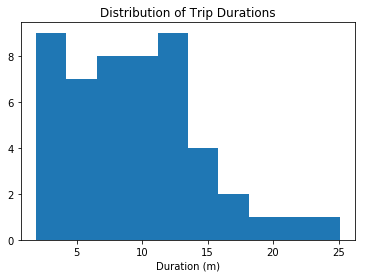

In [13]:
# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [14]:
def get_trip_lengths(filename, by_user_type=False):
    """
    This function reads in a file with trip data and returns the trip lengths in one of two ways.
    If 'by_user_type' is set to True when the function is called, then the function returns a tuple
    where the first element is a list of trip lengths for subscribers and the second element is a
    list of trip lengths for customers. If this optional argument is left alone (default is False),
    then the function will return the trip lengths for all rides.
    """
    
    with open(filename, 'r') as f:
        reader = csv.DictReader(f) # set up csv DictReader object
        
        if by_user_type:
            # If we want a list of trip lengths for each user type, then this section of the conditional will execute.
            
            subscriber_trip_data = [] # initialize the subscriber trip data list
            customer_trip_data = []   # initialize the customer trip data list
            
            # build the two trip data lists
            for row in reader:
                if row['user_type'] == 'Subscriber':
                    subscriber_trip_data.append(float(row['duration']))
                else:
                    customer_trip_data.append(float(row['duration']))
            
            return subscriber_trip_data, customer_trip_data # return the tuple of trip data lists
        else:
            # If we want all trip lengths in one list, then this section of the conditional will execute.
        
            trip_data = [] # initialize the trip data list
        
            # build the trip data list
            for row in reader:
                trip_data.append(float(row['duration'])) # convert duration string to float
        
            return trip_data # return the trip data list

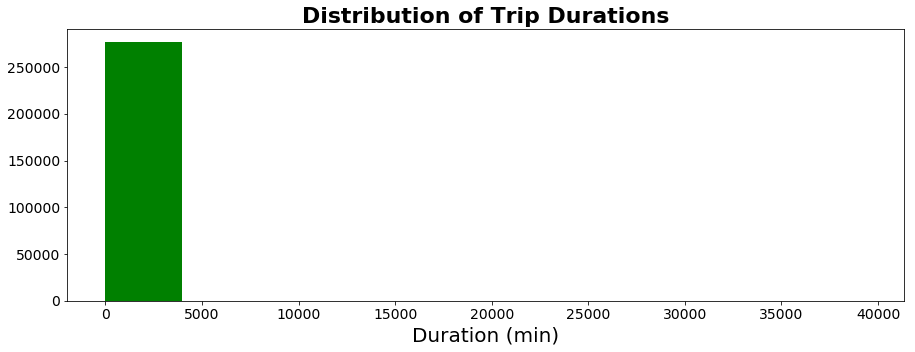

In [15]:
# get the trip length data for NYC and plot a histogram
trip_data = get_trip_lengths('./data/NYC-2016-Summary.csv')
plt.figure(figsize=(15, 5))
plt.hist(trip_data, color='green')
plt.title('Distribution of Trip Durations', fontsize=22, fontweight='bold')
plt.xlabel('Duration (min)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: For New York City subscribers, the peak of the distribution is the interval 5-10 minutes. For New York City customers, the peak of the distribution is the interval 20-25 minutes. I would describe the shape of these distributions as positively skewed. They look like Gamma distributions, which is how I would model them if I were going to use the data to make predictions.

In [16]:
# get the trip length data for NYC subscribers and customers
subscriber_trip_data, customer_trip_data = get_trip_lengths('./data/NYC-2016-Summary.csv', by_user_type=True)

In [17]:
subscriber_mean = np.mean(subscriber_trip_data)
subscriber_median = np.median(subscriber_trip_data)
customer_mean = np.mean(customer_trip_data)
customer_median = np.median(customer_trip_data)
print(subscriber_mean)
print(subscriber_median)
print(customer_mean)
print(customer_median)

subscriber_mean_trim = np.mean([x for x in subscriber_trip_data if x < 75])
subscriber_median_trim = np.median([x for x in subscriber_trip_data if x < 75])
customer_mean_trim = np.mean([x for x in customer_trip_data if x < 75])
customer_median_trim = np.median([x for x in customer_trip_data if x < 75])
print(subscriber_mean_trim)
print(subscriber_median_trim)
print(customer_mean_trim)
print(customer_median_trim)

13.6807905239
9.71666666667
32.7759513947
21.2
12.2250570841
9.7
22.170240508
20.6166666667


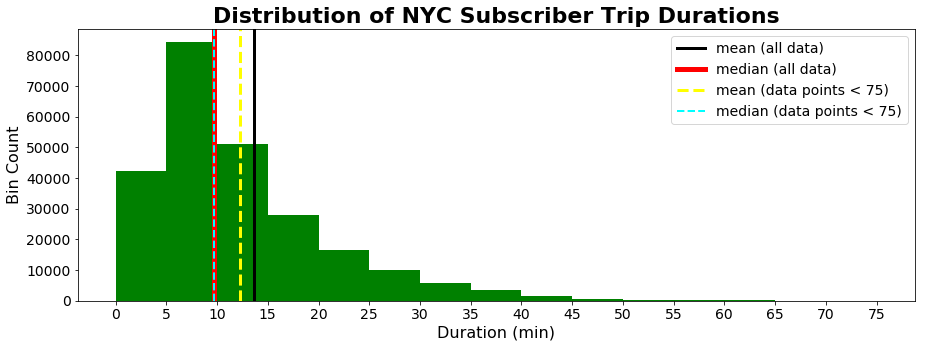

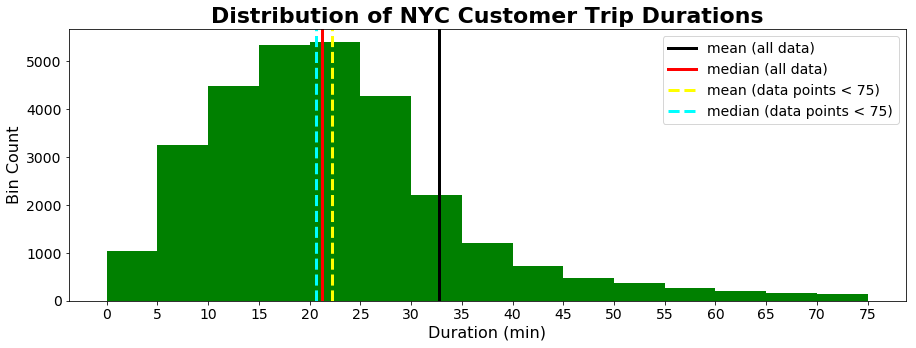

In [18]:
# histogram for NYC subscribers
plt.figure(figsize=(15, 5))
plt.hist(subscriber_trip_data, color='green', range=(0, 75), bins=15)
plt.axvline(subscriber_mean, color='black', linestyle='solid', linewidth=3, label='mean (all data)')
plt.axvline(subscriber_median, color='red', linestyle='solid', linewidth=5, label='median (all data)')
plt.axvline(subscriber_mean_trim, color='yellow', linestyle='dashed', linewidth=3, label='mean (data points < 75)')
plt.axvline(subscriber_median_trim, color='cyan', linestyle='dashed', linewidth=2, label='median (data points < 75)')
plt.title('Distribution of NYC Subscriber Trip Durations', fontsize=22, fontweight='bold')
plt.xlabel('Duration (min)', fontsize=16)
plt.ylabel('Bin Count', fontsize=16)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# histogram for NYC customers
plt.figure(figsize=(15, 5))
plt.hist(customer_trip_data, color='green', range=(0, 75), bins=15)
plt.axvline(customer_mean, color='black', linestyle='solid', linewidth=3, label='mean (all data)')
plt.axvline(customer_median, color='red', linestyle='solid', linewidth=3, label='median (all data)')
plt.axvline(customer_mean_trim, color='yellow', linestyle='dashed', linewidth=3, label='mean (data points < 75)')
plt.axvline(customer_median_trim, color='cyan', linestyle='dashed', linewidth=3, label='median (data points < 75)')
plt.title('Distribution of NYC Customer Trip Durations', fontsize=22, fontweight='bold')
plt.xlabel('Duration (min)', fontsize=16)
plt.ylabel('Bin Count', fontsize=16)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [19]:
# all data for use making a boxplot
boxplot_data_all = [subscriber_trip_data, customer_trip_data]

# only data points that are less than 75 for use making a boxplot
subscriber_trip_data_trim = [x for x in subscriber_trip_data if x < 75]
customer_trip_data_trim = [x for x in customer_trip_data if x < 75]
boxplot_data_trim = [subscriber_trip_data_trim, customer_trip_data_trim]

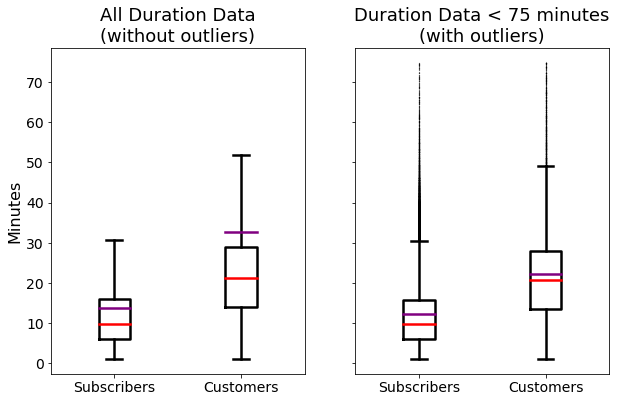

In [20]:
# boxplots for NYC trip duration data
p1 = dict(linestyle='-', linewidth=2.5, color='black')
p2 = dict(marker='.', markerfacecolor='none', markersize=0.25, linestyle='none')
p3 = dict(linestyle='-', linewidth=2.5, color='red')
p4 = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
p5 = dict(linestyle='-', linewidth=2.5, color='purple')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

axes[0].boxplot(boxplot_data_all, widths=0.25, boxprops=p1, showmeans=True, meanline=True, meanprops=p5, 
                medianprops=p3, whiskerprops=p1, capprops=p1, showfliers=False, labels=['Subscribers', 'Customers'])
axes[0].set_title('All Duration Data\n(without outliers)', fontsize=18)
axes[0].tick_params(labelsize=14)
axes[0].set_ylabel('Minutes', fontsize=16)

axes[1].boxplot(boxplot_data_trim, widths=0.25, boxprops=p1, showmeans=True, meanline=True, meanprops=p5, 
                medianprops=p3, whiskerprops=p1, capprops=p1, showfliers=True, flierprops=p2, 
                labels=['Subscribers', 'Customers'])
axes[1].set_title('Duration Data < 75 minutes\n(with outliers)', fontsize=18)
axes[1].tick_params(labelsize=14)

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: The questions presented in the second bullet above aligns closely with the third question that I posed in my answer to Question 1. I will write the code to answer all the questions in that bullet, and produce corresponding visualizations for each. I used the `matplotlib` online documentation [1] to assist me with some of the keyword arguments while producing the plots below.  
- **Is the pattern of ridership different on the weekends versus weekdays?** For two of the cities (NYC and Washington) the total number of rides increases beginning on Monday, peaks in the middle of the work week, and then decreases again through Friday. In each of those two cities there is a noticeable dropoff in ridership volume on the weekend that is clearly lower than all weekdays. In Chicago the ridership pattern during the work week appears to behave exactly the opposite by decreasing beginning on Monday, achieving a low on Wednesday, and then rising again through Friday. The weekend ridership totals for Chicago are lower than most of the work week but not the middle of the work week.  
- **On what days are Subscribers most likely to use the system? What about Customers?** Based on the number totals printed below and the visualizations, the answers to these questions is fairly clear. Subscribers are most likely to use the system on weekdays, and customers are most likely to use the system on weekends. This makes sense to me. It seems probable that subscribers use the system to commute to and from work during the work week; whereas, customers likely use the system when visiting these cites for recreation on weekends.  
- **Does the average duration of rides change depending on the day of the week?** The mean duration of rides definitely depends on the day of the week. The mean duration of rides clearly increases significantly on the weekend when we consider both user types as a whole and when we consider just the subscriber data. This makes sense to me for a number of reasons. Subscribers likely use the system for commuting to and from work during the week, but when a subscriber uses the system on the weekend, he or she likely uses the system for recreation like a customer. The mean duration for customers doesn't seem to really increase (or decrease) on weekends over weekdays, but customers already have long durations during the week. It seems probable that customers use the system the same during the work week as they do during the weekend regarding purpose (e.g., longer duration recreation rides), despite there being fewer customers using the system during the work week.

In [21]:
def get_dow_counts(filename, by_user_type=False):
    """
    This function reads in a file with trip data and returns the number of trips by day of week
    in one of two ways. If 'by_user_type' is set to True when the function is called, then the 
    function returns a tuple where the first element is a list of trip counts by day of week for 
    subscribers and the second element is a list of trip counts by day of week for customers.
    If this optional argument is left alone (default is False), then the function will return
    the trip counts by day of week for all rides.
    """
    
    with open(filename, 'r') as f:
        reader = csv.DictReader(f) # set up csv DictReader object
        
        if by_user_type:
            # If we want d.o.w. trip counts for each user type, then this section of the conditional will execute.
            
            subscriber_dow_counts = [0, 0, 0, 0, 0, 0, 0] # initialize the subscriber counts by d.o.w.
            customer_dow_counts = [0, 0, 0, 0, 0, 0, 0]   # initialize the customer counts by d.o.w.
            
            # build the two d.o.w. trip count lists
            for row in reader:
                if row['user_type'] == 'Subscriber':
                    if row['day_of_week'] == 'Monday':
                        subscriber_dow_counts[0] += 1
                    elif row['day_of_week'] == 'Tuesday':
                        subscriber_dow_counts[1] += 1
                    elif row['day_of_week'] == 'Wednesday':
                        subscriber_dow_counts[2] += 1
                    elif row['day_of_week'] == 'Thursday':
                        subscriber_dow_counts[3] += 1
                    elif row['day_of_week'] == 'Friday':
                        subscriber_dow_counts[4] += 1
                    elif row['day_of_week'] == 'Saturday':
                        subscriber_dow_counts[5] += 1
                    else:
                        subscriber_dow_counts[6] += 1
                else:
                    if row['day_of_week'] == 'Monday':
                        customer_dow_counts[0] += 1
                    elif row['day_of_week'] == 'Tuesday':
                        customer_dow_counts[1] += 1
                    elif row['day_of_week'] == 'Wednesday':
                        customer_dow_counts[2] += 1
                    elif row['day_of_week'] == 'Thursday':
                        customer_dow_counts[3] += 1
                    elif row['day_of_week'] == 'Friday':
                        customer_dow_counts[4] += 1
                    elif row['day_of_week'] == 'Saturday':
                        customer_dow_counts[5] += 1
                    else:
                        customer_dow_counts[6] += 1
            
            return subscriber_dow_counts, customer_dow_counts # return the tuple of d.o.w. trip counts
        else:
            # If we want d.o.w. trip counts for all rides, then this section of the conditional will execute.
        
            dow_counts = [0, 0, 0, 0, 0, 0, 0] # initialize the counts by d.o.w.
        
            # build the trip data list
            for row in reader:
                if row['day_of_week'] == 'Monday':
                    dow_counts[0] += 1
                elif row['day_of_week'] == 'Tuesday':
                    dow_counts[1] += 1
                elif row['day_of_week'] == 'Wednesday':
                    dow_counts[2] += 1
                elif row['day_of_week'] == 'Thursday':
                    dow_counts[3] += 1
                elif row['day_of_week'] == 'Friday':
                    dow_counts[4] += 1
                elif row['day_of_week'] == 'Saturday':
                    dow_counts[5] += 1
                else:
                    dow_counts[6] += 1
        
            return dow_counts # return the d.o.w. trip counts


City: NYC
Total number of Monday rides:    39340
Total number of Tuesday rides:   42405
Total number of Wednesday rides: 44629
Total number of Thursday rides:  44330
Total number of Friday rides:    41389
Total number of Saturday rides:  33353
Total number of Sunday rides:    31352

City: Chicago
Total number of Monday rides:    11286
Total number of Tuesday rides:   10911
Total number of Wednesday rides:  9604
Total number of Thursday rides:  10008
Total number of Friday rides:    10741
Total number of Saturday rides:   9927
Total number of Sunday rides:     9654

City: Washington
Total number of Monday rides:     9394
Total number of Tuesday rides:    9748
Total number of Wednesday rides: 10103
Total number of Thursday rides:   9984
Total number of Friday rides:     9970
Total number of Saturday rides:   8900
Total number of Sunday rides:     8227


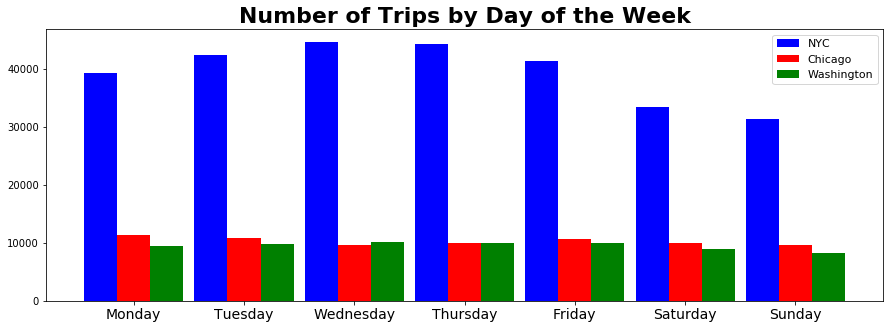

In [22]:
city_plot_data_1 = {} # initialize a dictionary to store data for plotting

for city, filename in city_info_2.items():
    dow_counts = get_dow_counts(filename)
    city_plot_data_1[city] = dow_counts
    
    # print trip counts by day of the week for each city
    print('\nCity: {}'.format(city))
    print('Total number of Monday rides:    {:5d}'.format(dow_counts[0]))
    print('Total number of Tuesday rides:   {:5d}'.format(dow_counts[1]))
    print('Total number of Wednesday rides: {:5d}'.format(dow_counts[2]))
    print('Total number of Thursday rides:  {:5d}'.format(dow_counts[3]))
    print('Total number of Friday rides:    {:5d}'.format(dow_counts[4]))
    print('Total number of Saturday rides:  {:5d}'.format(dow_counts[5]))
    print('Total number of Sunday rides:    {:5d}'.format(dow_counts[6]))
    
fig1, ax1 = plt.subplots(figsize=(15, 5))
indices = np.arange(7)
bar_width = 0.3
nyc_bars = plt.bar(indices, city_plot_data_1['NYC'], bar_width, color='blue', label='NYC')
chi_bars = plt.bar(indices + bar_width, city_plot_data_1['Chicago'], bar_width, color='red', label='Chicago')
was_bars = plt.bar(indices + 2*bar_width, city_plot_data_1['Washington'], bar_width, color='green', label='Washington')
plt.xticks([0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3],
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=14)
plt.title('Number of Trips by Day of the Week', fontsize=22, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

**NOTE**: After inspecting the bar chart above, we notice that the number of trips in NYC greatly outnumbers the number of trips from both of the other two cities. This tends to mask the visualization of the daily variation by extending the y-axis units from zero to 40,000. As such, I want to split the visualization into two charts: one for NYC alone and a second one for the other two cities.

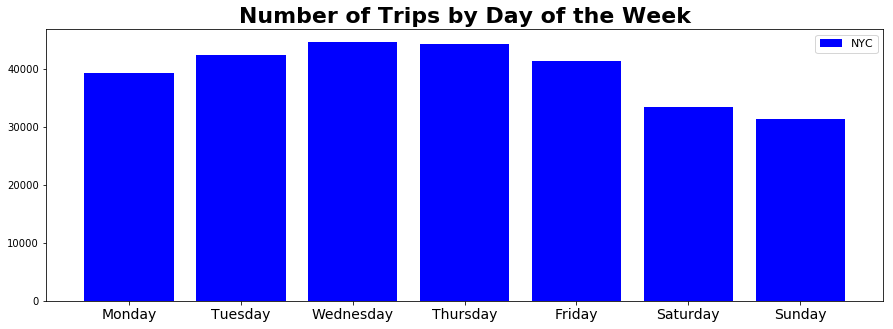

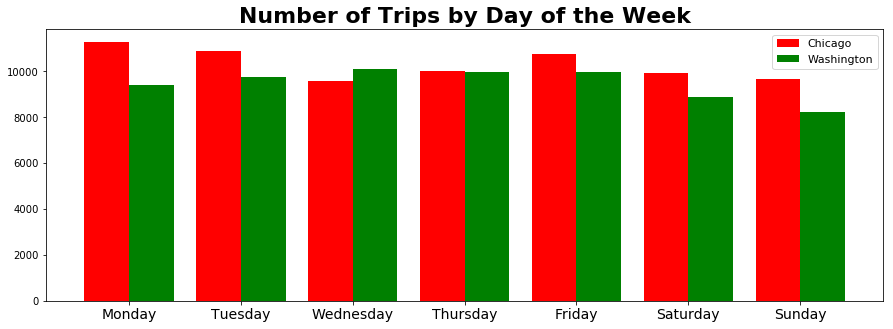

In [23]:
# plot NYC trip counts by day of the week
fig2, ax2 = plt.subplots(figsize=(15, 5))
indices = np.arange(7)
bar_width = 0.8
nyc_bars = plt.bar(indices, city_plot_data_1['NYC'], bar_width, color='blue', label='NYC')
# plt.ylim(30000, 45000) # uncomment if you want a 'zoomed-in' version near the bar peaks
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=14)
plt.title('Number of Trips by Day of the Week', fontsize=22, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

# plot Chicago and Washington trip counts by day of the week
fig3, ax3 = plt.subplots(figsize=(15, 5))
indices = np.arange(7)
bar_width = 0.4
chi_bars = plt.bar(indices, city_plot_data_1['Chicago'], bar_width, color='red', label='Chicago')
was_bars = plt.bar(indices + bar_width, city_plot_data_1['Washington'], bar_width, color='green', label='Washington')
# plt.ylim(8000, 11500) # uncomment if you want a 'zoomed-in' version near the bar peaks
plt.xticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2],
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=14)
plt.title('Number of Trips by Day of the Week', fontsize=22, fontweight='bold')
plt.legend(fontsize=11)
plt.show()


City: NYC
Total Monday rides    --> Subscriber: 35623, Customer: 3717
Total Tuesday rides   --> Subscriber: 39487, Customer: 2918
Total Wednesday rides --> Subscriber: 41403, Customer: 3226
Total Thursday rides  --> Subscriber: 41197, Customer: 3133
Total Friday rides    --> Subscriber: 37606, Customer: 3783
Total Saturday rides  --> Subscriber: 26126, Customer: 7227
Total Sunday rides    --> Subscriber: 24454, Customer: 6898

City: Chicago
Total Monday rides    --> Subscriber: 8840, Customer: 2446
Total Tuesday rides   --> Subscriber: 9356, Customer: 1555
Total Wednesday rides --> Subscriber: 8447, Customer: 1157
Total Thursday rides  --> Subscriber: 8643, Customer: 1365
Total Friday rides    --> Subscriber: 8648, Customer: 2093
Total Saturday rides  --> Subscriber: 5676, Customer: 4251
Total Sunday rides    --> Subscriber: 5372, Customer: 4282

City: Washington
Total Monday rides    --> Subscriber: 7658, Customer: 1736
Total Tuesday rides   --> Subscriber: 8322, Customer: 1426
Total

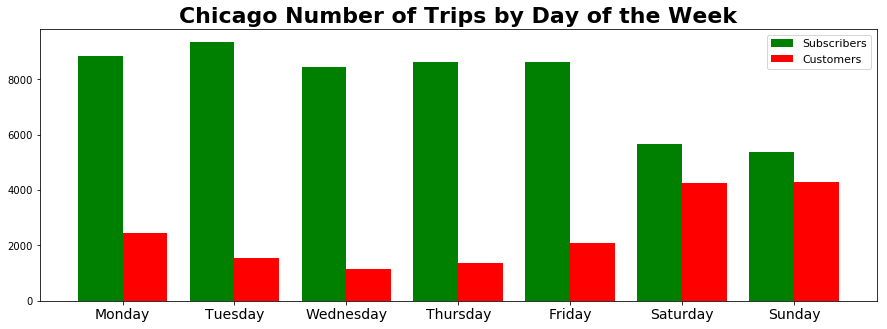

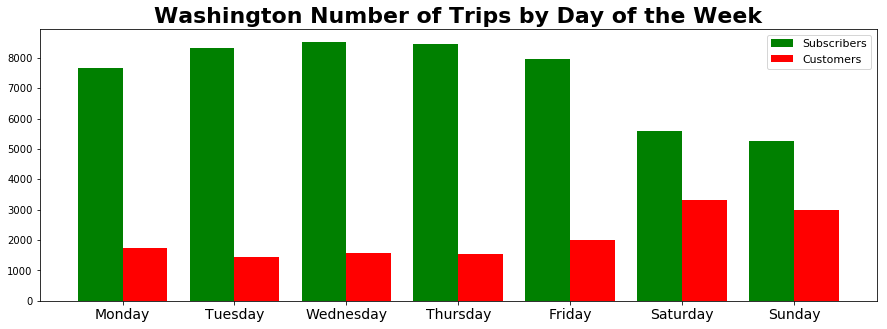

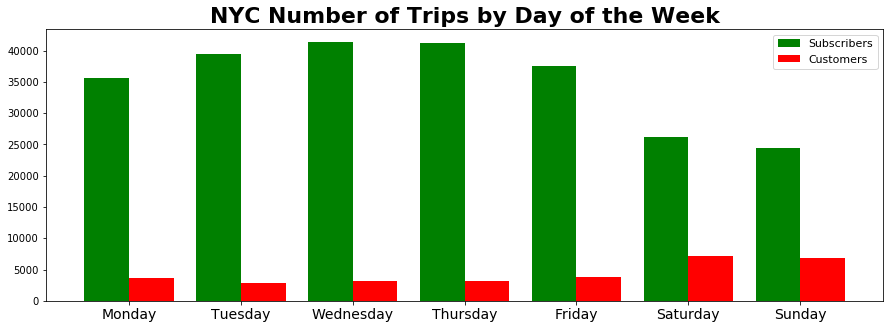

In [24]:
city_plot_data_2 = {} # initialize a dictionary to store data for plotting

for city, filename in city_info_2.items():
    subscriber_dow_counts, customer_dow_counts = get_dow_counts(filename, by_user_type=True)
    city_plot_data_2[city] = [subscriber_dow_counts, customer_dow_counts]
    
    # print subscriber/customer trip counts by day of the week for each city
    print('\nCity: {}'.format(city))
    print('Total Monday rides    --> Subscriber: {}, Customer: {}'
          .format(subscriber_dow_counts[0], customer_dow_counts[0]))
    print('Total Tuesday rides   --> Subscriber: {}, Customer: {}'
          .format(subscriber_dow_counts[1], customer_dow_counts[1]))
    print('Total Wednesday rides --> Subscriber: {}, Customer: {}'
          .format(subscriber_dow_counts[2], customer_dow_counts[2]))
    print('Total Thursday rides  --> Subscriber: {}, Customer: {}'
          .format(subscriber_dow_counts[3], customer_dow_counts[3]))
    print('Total Friday rides    --> Subscriber: {}, Customer: {}'
          .format(subscriber_dow_counts[4], customer_dow_counts[4]))
    print('Total Saturday rides  --> Subscriber: {}, Customer: {}'
          .format(subscriber_dow_counts[5], customer_dow_counts[5]))
    print('Total Sunday rides    --> Subscriber: {}, Customer: {}'
          .format(subscriber_dow_counts[6], customer_dow_counts[6]))

# plot the d.o.w. trip counts for Chicago
fig4, ax4 = plt.subplots(figsize=(15, 5))
indices = np.arange(7)
bar_width = 0.4
sub_bars = plt.bar(indices, city_plot_data_2['Chicago'][0], bar_width, color='green', label='Subscribers')
cus_bars = plt.bar(indices + bar_width, city_plot_data_2['Chicago'][1], bar_width, color='red', label='Customers')
plt.xticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2],
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=14)
plt.title('Chicago Number of Trips by Day of the Week', fontsize=22, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

# plot the d.o.w. trip counts for Washington
fig5, ax5 = plt.subplots(figsize=(15, 5))
indices = np.arange(7)
bar_width = 0.4
sub_bars = plt.bar(indices, city_plot_data_2['Washington'][0], bar_width, color='green', label='Subscribers')
cus_bars = plt.bar(indices + bar_width, city_plot_data_2['Washington'][1], bar_width, color='red', label='Customers')
plt.xticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2],
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=14)
plt.title('Washington Number of Trips by Day of the Week', fontsize=22, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

# plot the d.o.w. trip counts for NYC
fig6, ax6 = plt.subplots(figsize=(15, 5))
indices = np.arange(7)
bar_width = 0.4
sub_bars = plt.bar(indices, city_plot_data_2['NYC'][0], bar_width, color='green', label='Subscribers')
cus_bars = plt.bar(indices + bar_width, city_plot_data_2['NYC'][1], bar_width, color='red', label='Customers')
plt.xticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2],
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=14)
plt.title('NYC Number of Trips by Day of the Week', fontsize=22, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

In [25]:
def get_dow_durations(filename, by_user_type=False):  
    """
    This function reads in a file with trip data and returns the trip lengths by day of week
    in one of two ways. If 'by_user_type' is set to True when the function is called, then the 
    function returns a tuple where the first element is a list of trip lengths by day of week for 
    subscribers and the second element is a list of trip lengths by day of week for customers.
    If this optional argument is left alone (default is False), then the function will return
    the trip lengths by day of week for all rides.
    """
    
    with open(filename, 'r') as f:
        reader = csv.DictReader(f) # set up csv DictReader object
        
        if by_user_type:
            # If we want d.o.w. trip lengths for each user type, then this section of the conditional will execute.
            
            subscriber_dow_durations = [[], [], [], [], [], [], []] # initialize the subscriber durations by d.o.w.
            customer_dow_durations = [[], [], [], [], [], [], []]   # initialize the customer durations by d.o.w.
            
            # build the two d.o.w. trip length lists
            for row in reader:
                if row['user_type'] == 'Subscriber':
                    if row['day_of_week'] == 'Monday':
                        subscriber_dow_durations[0].append(float(row['duration']))
                    elif row['day_of_week'] == 'Tuesday':
                        subscriber_dow_durations[1].append(float(row['duration']))
                    elif row['day_of_week'] == 'Wednesday':
                        subscriber_dow_durations[2].append(float(row['duration']))
                    elif row['day_of_week'] == 'Thursday':
                        subscriber_dow_durations[3].append(float(row['duration']))
                    elif row['day_of_week'] == 'Friday':
                        subscriber_dow_durations[4].append(float(row['duration']))
                    elif row['day_of_week'] == 'Saturday':
                        subscriber_dow_durations[5].append(float(row['duration']))
                    else:
                        subscriber_dow_durations[6].append(float(row['duration']))
                else:
                    if row['day_of_week'] == 'Monday':
                        customer_dow_durations[0].append(float(row['duration']))
                    elif row['day_of_week'] == 'Tuesday':
                        customer_dow_durations[1].append(float(row['duration']))
                    elif row['day_of_week'] == 'Wednesday':
                        customer_dow_durations[2].append(float(row['duration']))
                    elif row['day_of_week'] == 'Thursday':
                        customer_dow_durations[3].append(float(row['duration']))
                    elif row['day_of_week'] == 'Friday':
                        customer_dow_durations[4].append(float(row['duration']))
                    elif row['day_of_week'] == 'Saturday':
                        customer_dow_durations[5].append(float(row['duration']))
                    else:
                        customer_dow_durations[6].append(float(row['duration']))
            
            return subscriber_dow_durations, customer_dow_durations # return the tuple of d.o.w. trip lengths
        else:
            # If we want d.o.w. trip lengths for all rides, then this section of the conditional will execute.
        
            dow_durations = [[], [], [], [], [], [], []] # initialize the durations by d.o.w.
        
            # build the trip data list
            for row in reader:
                if row['day_of_week'] == 'Monday':
                    dow_durations[0].append(float(row['duration']))
                elif row['day_of_week'] == 'Tuesday':
                    dow_durations[1].append(float(row['duration']))
                elif row['day_of_week'] == 'Wednesday':
                    dow_durations[2].append(float(row['duration']))
                elif row['day_of_week'] == 'Thursday':
                    dow_durations[3].append(float(row['duration']))
                elif row['day_of_week'] == 'Friday':
                    dow_durations[4].append(float(row['duration']))
                elif row['day_of_week'] == 'Saturday':
                    dow_durations[5].append(float(row['duration']))
                else:
                    dow_durations[6].append(float(row['duration']))
        
            return dow_durations # return the d.o.w. trip lengths

In [26]:
city_plot_data_3 = {} # initialize a dictionary to store data for plotting

for city, filename in city_info_2.items():
    dow_durations = get_dow_durations(filename)
    city_plot_data_3[city] = [np.mean(day_data) for day_data in dow_durations]
    
    # print mean trip lengths by day of the week for each city
    print('\nCity: {}'.format(city))
    print('Monday mean trip length:    {:4.1f} minutes'.format(city_plot_data_3[city][0]))
    print('Tuesday mean trip length:   {:4.1f} minutes'.format(city_plot_data_3[city][1]))
    print('Wednesday mean trip length: {:4.1f} minutes'.format(city_plot_data_3[city][2]))
    print('Thursday mean trip length:  {:4.1f} minutes'.format(city_plot_data_3[city][3]))
    print('Friday mean trip length:    {:4.1f} minutes'.format(city_plot_data_3[city][4]))
    print('Saturday mean trip length:  {:4.1f} minutes'.format(city_plot_data_3[city][5]))
    print('Sunday mean trip length:    {:4.1f} minutes'.format(city_plot_data_3[city][6]))


City: NYC
Monday mean trip length:    15.1 minutes
Tuesday mean trip length:   14.3 minutes
Wednesday mean trip length: 14.6 minutes
Thursday mean trip length:  14.6 minutes
Friday mean trip length:    16.0 minutes
Saturday mean trip length:  18.8 minutes
Sunday mean trip length:    18.8 minutes

City: Chicago
Monday mean trip length:    16.1 minutes
Tuesday mean trip length:   14.3 minutes
Wednesday mean trip length: 14.5 minutes
Thursday mean trip length:  13.9 minutes
Friday mean trip length:    15.6 minutes
Saturday mean trip length:  20.6 minutes
Sunday mean trip length:    21.4 minutes

City: Washington
Monday mean trip length:    17.6 minutes
Tuesday mean trip length:   16.7 minutes
Wednesday mean trip length: 16.3 minutes
Thursday mean trip length:  16.7 minutes
Friday mean trip length:    17.9 minutes
Saturday mean trip length:  24.8 minutes
Sunday mean trip length:    24.0 minutes


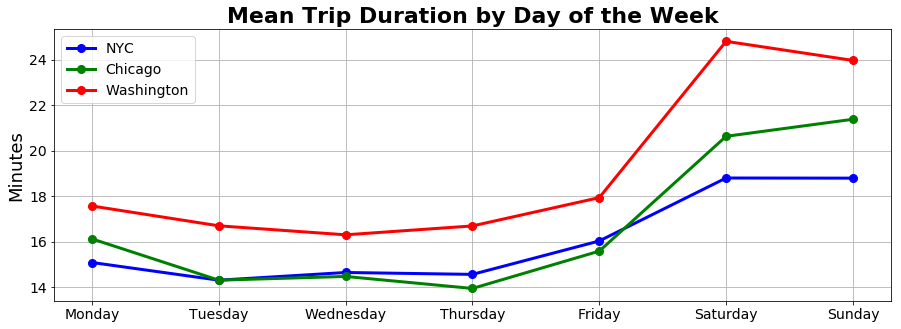

In [27]:
# plot the d.o.w. mean trip lengths for NYC, Chicago, and Washington
fig7, ax7 = plt.subplots(figsize=(15, 5))
indices = np.arange(7)
plt.plot(indices, city_plot_data_3['NYC'], 'bo-', label='NYC', markersize=8, linewidth=3)
plt.plot(indices, city_plot_data_3['Chicago'], 'go-', label='Chicago', markersize=8, linewidth=3)
plt.plot(indices, city_plot_data_3['Washington'], 'ro-', label='Washington', markersize=8, linewidth=3)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Minutes', fontsize=18)
plt.title('Mean Trip Duration by Day of the Week', fontsize=22, fontweight='bold')
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [28]:
city_plot_data_4 = {} # initialize a dictionary to store data for plotting

for city, filename in city_info_2.items():
    subscriber_dow_durations, customer_dow_durations = get_dow_durations(filename, by_user_type=True)
    city_plot_data_4[city] = [[np.mean(sub_day_data) for sub_day_data in subscriber_dow_durations],
                              [np.mean(cus_day_data) for cus_day_data in customer_dow_durations]]
    
    # print subscriber/customer mean trip lengths by day of the week for each city
    print('\nCity: {}'.format(city))
    print('Monday mean trip length    --> Subscriber: {0:4.1f} minutes, Customer: {1:4.1f} minutes'
          .format(city_plot_data_4[city][0][0], city_plot_data_4[city][1][0]))
    print('Tuesday mean trip length   --> Subscriber: {0:4.1f} minutes, Customer: {1:4.1f} minutes'
          .format(city_plot_data_4[city][0][1], city_plot_data_4[city][1][1]))
    print('Wednesday mean trip length --> Subscriber: {0:4.1f} minutes, Customer: {1:4.1f} minutes'
          .format(city_plot_data_4[city][0][2], city_plot_data_4[city][1][2]))
    print('Thursday mean trip length  --> Subscriber: {0:4.1f} minutes, Customer: {1:4.1f} minutes'
          .format(city_plot_data_4[city][0][3], city_plot_data_4[city][1][3]))
    print('Friday mean trip length    --> Subscriber: {0:4.1f} minutes, Customer: {1:4.1f} minutes'
          .format(city_plot_data_4[city][0][4], city_plot_data_4[city][1][4]))
    print('Saturday mean trip length  --> Subscriber: {0:4.1f} minutes, Customer: {1:4.1f} minutes'
          .format(city_plot_data_4[city][0][5], city_plot_data_4[city][1][5]))
    print('Sunday mean trip length    --> Subscriber: {0:4.1f} minutes, Customer: {1:4.1f} minutes'
          .format(city_plot_data_4[city][0][6], city_plot_data_4[city][1][6]))


City: NYC
Monday mean trip length    --> Subscriber: 13.2 minutes, Customer: 33.0 minutes
Tuesday mean trip length   --> Subscriber: 12.9 minutes, Customer: 33.1 minutes
Wednesday mean trip length --> Subscriber: 13.2 minutes, Customer: 33.4 minutes
Thursday mean trip length  --> Subscriber: 13.3 minutes, Customer: 31.2 minutes
Friday mean trip length    --> Subscriber: 14.4 minutes, Customer: 32.6 minutes
Saturday mean trip length  --> Subscriber: 14.8 minutes, Customer: 33.1 minutes
Sunday mean trip length    --> Subscriber: 14.9 minutes, Customer: 32.6 minutes

City: Chicago
Monday mean trip length    --> Subscriber: 12.1 minutes, Customer: 30.5 minutes
Tuesday mean trip length   --> Subscriber: 11.5 minutes, Customer: 31.0 minutes
Wednesday mean trip length --> Subscriber: 12.1 minutes, Customer: 31.9 minutes
Thursday mean trip length  --> Subscriber: 11.5 minutes, Customer: 29.5 minutes
Friday mean trip length    --> Subscriber: 11.7 minutes, Customer: 31.5 minutes
Saturday mean 

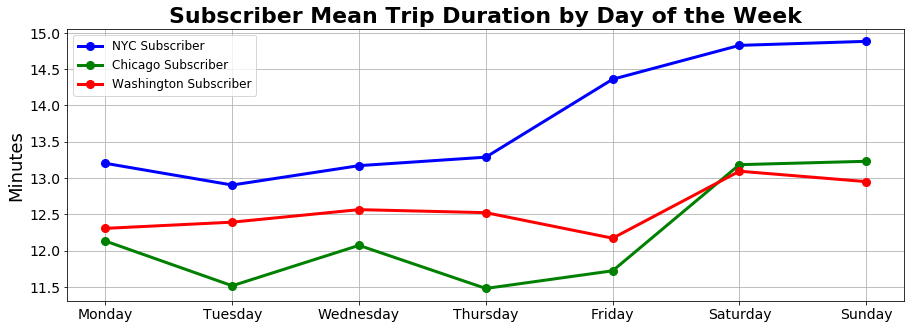

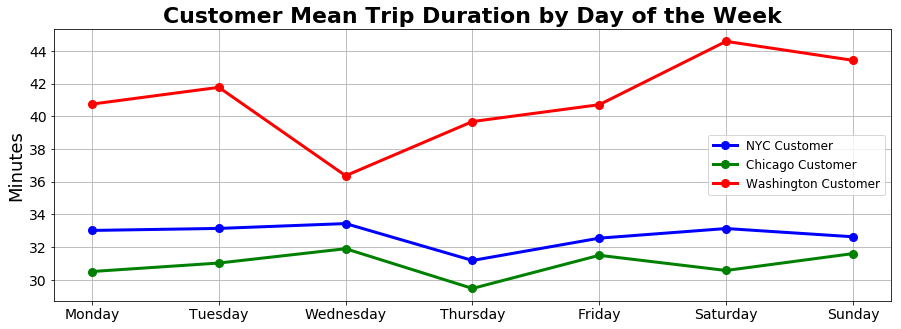

In [29]:
# plot the subscriber d.o.w. mean trip lengths for NYC, Chicago, and Washington
fig8, ax8 = plt.subplots(figsize=(15, 5))
indices = np.arange(7)
plt.plot(indices, city_plot_data_4['NYC'][0], 'bo-', label='NYC Subscriber', markersize=8, linewidth=3)
plt.plot(indices, city_plot_data_4['Chicago'][0], 'go-', label='Chicago Subscriber', markersize=8, linewidth=3)
plt.plot(indices, city_plot_data_4['Washington'][0], 'ro-', label='Washington Subscriber', markersize=8, linewidth=3)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Minutes', fontsize=18)
plt.title('Subscriber Mean Trip Duration by Day of the Week', fontsize=22, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid()
plt.show()

# plot the customer d.o.w. mean trip lengths for NYC, Chicago, and Washington
fig9, ax9 = plt.subplots(figsize=(15, 5))
indices = np.arange(7)
plt.plot(indices, city_plot_data_4['NYC'][1], 'bo-', label='NYC Customer', markersize=8, linewidth=3)
plt.plot(indices, city_plot_data_4['Chicago'][1], 'go-', label='Chicago Customer', markersize=8, linewidth=3)
plt.plot(indices, city_plot_data_4['Washington'][1], 'ro-', label='Washington Customer', markersize=8, linewidth=3)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Minutes', fontsize=18)
plt.title('Customer Mean Trip Duration by Day of the Week', fontsize=22, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid()
plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: As an experienced mathematician, my interests lean more toward purely scientific applications as opposed to business applications. More recently I have been interested in bioinformatics and climate science, two disciplines that rely heavily on processing large data sets. Before answering the question further, I would like to mention that my primary interest in the Data Analyst Nanodegree is to learn the skills that I believe are prerequisite to being successful in the Machine Learning Engineering Nanodegree. I would like to learn how we can apply data science to better understand and improve climate models. I want learn how to use machine learning to predict long-term trends in climate in three scenarios:  
- human activity regarding the release of greenhouse gases levels off in the next several decades,  
- humans dramatically reduce the volume of greenhouse gases released in the next several decades,  
- humans do not learn from science and continue to increase the volume of greenhouse gases released in the next several decades.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

<a id='resources'></a>
## Resources

[1] matplotlib documentation. Retrieved from [https://matplotlib.org/api/pyplot_api.html](https://matplotlib.org/api/pyplot_api.html) between September 19, 2017 and September 21, 2017.